# Introduction to quantum photonics

In [1]:
import qoptkit                                   # QOPTKIT module
import numpy as np                               # Numpy
from math  import acos,sqrt,pi                   # Mathematical module
from qiskit import Aer,QuantumCircuit            # QISKIT Tools 
from qiskit.visualization import plot_histogram  # QISKIT Visualization tools

## 1 Basic concepts

### 1.1 Circuit and state

<p style='text-align: justify'> An optical quantum computer is based on an ensemble of indistinguishable photons traveling through a set of optical gates. The kind of optical gates used and their interconnections define the circuit. The ensemble of photons define the state of the quantum operation. In a superconductor qubit based hardware, the active part of the computation is performed by the qubits. However, in an optical quantum computer the active part of the computation is performed by photons traveling trough the circuit. Therefore a quantum optical computer will consist of a set of emitters, an optical circuit and a set of detectors. Those define the input state, the transformation rules of the circuit and the output state respectively.  </p>
    
<p style='text-align: justifty'> Photons may arrive to the optical circuit by different channels or modes. For example, we can see next a simple circuit made of a single balanced beamsplitter with two channels labeled as <i>"0"</i> and <i>"1"</i>. </p>

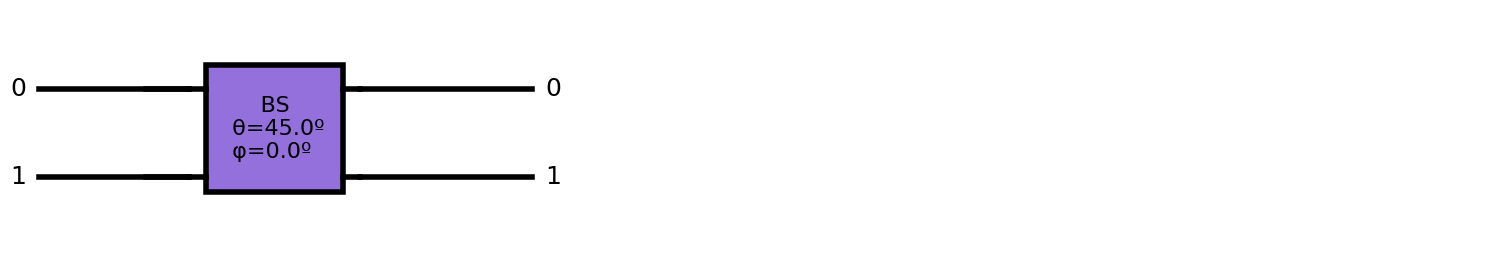

In [2]:
# Create circuit
hom = qoptkit.qocircuit(2);
# Build circuit
hom.bs(0,1,45.0,0.0)
# Plot circuit
hom.show()

A beamsplitter can be represented by the transformation between input and output bosonic operators:

$$ \begin{equation}
	\begin{matrix}
		\hat{a}_0^\dagger \rightarrow & \cos(\theta)\hat{a}_0^\dagger + e^{-i \phi}\sin(\theta) \hat{a}_1^\dagger  \\
		\hat{a}_1^\dagger \rightarrow & -e^{i \phi} \sin(\theta)\hat{a}_0^\dagger + \cos(\theta) \hat{a}_1^\dagger.  
	\end{matrix}
\end{equation} 
$$

<p style='text-align: justify'> For the moment, we can think of the channels in an optical circuit as being equivalent to qubits in a computer based on superconductor qubits. We will refine this idea later on. Note that photons are bosonic states therefore states of an optical quantum machine may have more than one photon in each channel. For example we can define a state with two photons in the first channel and zero photons in the second one as follows: </p>

In [3]:
# Define a |2,0> state
inputst = qoptkit.state(2,st=[[1.0,[2,0]]])
# Print the state
inputst.prnt_state()

 | 2, 0 >:  1.00000000 + 0.00000000 j



### 1.2 Simulation

<p style='text-align: justify'> By convention we consider that photons travel trough a circuit from the left to the right direction. We can use the previously defined state as an input state of the beamsplitter circuit and calculate the corresponding output state. </p>

In [4]:
# Create a simulator
sim=qoptkit.simulator()
# Calculate the output
outputst=sim.run(inputst,hom)
# Print output state
outputst.prnt_state()

 | 2, 0 >:  0.50000000 + 0.00000000 j
 | 1, 1 >:  0.70710678 + 0.00000000 j
 | 0, 2 >:  0.50000000 + 0.00000000 j



<p style='text-align: justify'> In this particular case we can see how each photon has a 1/2 of probability to be detected in each of the channels because the beamsplitter is balanced. Therefore, this circuit implements the transformation, </p>

$$ 
\begin{equation}
\begin{split}
|2, 0 \rangle &=\frac{\bigl(\hat{a}_{0}^{\dagger}\bigr)^{2}} {\sqrt{2!}}\frac{\bigl(\hat{a}_{1}^{\dagger}\bigr)^{0}}{\sqrt{0!}}|0, 0 \rangle 
\rightarrow \frac{1}{\sqrt{2}} \Bigl( \hat{a}_{0}^{\dagger}\frac{1}{\sqrt{2}}+\hat{a}_{1}^{\dagger}\frac{1}{\sqrt{2}}\Bigr)^{2} |0, 0 \rangle
= \frac{1}{2} |2, 0 \rangle + \sqrt2  |1, 1 \rangle + \frac{1}{2} |0, 2 \rangle
\end{split}
\end{equation}
$$

### 1.3 HOM Effect

<p style='text-align: justify'>  Of course, optical circuits may give rise to some interesting quantum effects. For example, the correlation at the output of indistinguishable photons that enter the beamsplitter by different channels. This effect is the well known  Hong-Ou-Mandel effect [1]. </p>

In [5]:
inputst = qoptkit.state(2,st=[[1.0,[1,1]]])
outputst=sim.run(inputst,hom)
print("Input state:")
inputst.prnt_state()
print("Output state:")
outputst.prnt_state()

Input state:
 | 1, 1 >:  1.00000000 + 0.00000000 j

Output state:
 | 2, 0 >: -0.70710678 + 0.00000000 j
 | 0, 2 >:  0.70710678 + 0.00000000 j



Note how in this case the outcome $|1,1\rangle$ does not appear. The Hong-Ou-Mandel effect results in bunching both photons in one or the other output channel of the beamsplitter.

## 2 Basic gates

### 2.1 Qubit encoding

<p style='text-align: justify'>  But how a qubit is defined in a quantum optical circuit? And how I can define some of the logical gates that I know? For example qubit rotations. There are various ways to encode a photonic state into a logical qubit state. In this tutorial we will use path encoding. But what is path encoding? </p>

<p style='text-align: justify'>  We will use a pair of channels to define a qubit. For example, channels <i>"0"</i> and <i>"1"</i> may define qubit <i>"0"</i>. There will be only one photon by each pair of channels defining a qubit. The position of the photon will define the qubit value. If the photon is on the first channel this represents a logical <i>"1"</i>. However, if the photon is in the second channel this means a logical <i>"0"</i>.</p>

Photonic state $\rightarrow$ qubit:

$|0,1\rangle\rightarrow |0 \rangle$

$|1,0\rangle\rightarrow |1 \rangle$

<p style='text-align: justify'> We can define a map specifying the channels for each qubit. Each pair of channels define a qubit and differentt qubits are defined in order from 0 to n.</p>

In [6]:
qmap=[[0, 1], [2, 3]]

<p style='text-align: justify'> In this particular case, the map specifies that channels <i>"0"</i> and <i>"1"</i> define qubit <i>"0"</i> while channels <i>"2"</i> and <i>"3"</i> define qubit <i>"1"</i>. We can encode photonic states into qubits with this map, <p>

In [7]:
# Define states
input0101 = qoptkit.state(4,st=[[1.0,[0,1,0,1]]]) #0101
input0110 = qoptkit.state(4,st=[[1.0,[0,1,1,0]]]) #0110
input1001 = qoptkit.state(4,st=[[1.0,[0,1,1,0]]]) #1001
input1010 = qoptkit.state(4,st=[[1.0,[0,1,1,0]]]) #1010

# Encode
encoded00=input0101.encode(qmap,hom) #00
encoded01=input0110.encode(qmap,hom) #01
encoded10=input1001.encode(qmap,hom) #10
encoded11=input1010.encode(qmap,hom) #11

# Print comparison
print("Photonic states:\n")
input0101.prnt_state()
input0110.prnt_state()
input1001.prnt_state()
input1010.prnt_state()
print("")
print("Equivalent logic states:\n")
encoded00.prnt_state()
encoded01.prnt_state()
encoded10.prnt_state()
encoded11.prnt_state()

Photonic states:

 | 0, 1, 0, 1 >:  1.00000000 + 0.00000000 j

 | 0, 1, 1, 0 >:  1.00000000 + 0.00000000 j

 | 0, 1, 1, 0 >:  1.00000000 + 0.00000000 j

 | 0, 1, 1, 0 >:  1.00000000 + 0.00000000 j


Equivalent logic states:

 | 0, 0 >:  1.00000000 + 0.00000000 j

 | 0, 1 >:  1.00000000 + 0.00000000 j

 | 0, 1 >:  1.00000000 + 0.00000000 j

 | 0, 1 >:  1.00000000 + 0.00000000 j



It is also possible to decode them back to photonic states,

In [8]:
# Decode
decoded00=encoded00.decode(qmap,[],hom) #00
decoded01=encoded01.decode(qmap,[],hom) #01
decoded10=encoded10.decode(qmap,[],hom) #10
decoded11=encoded11.decode(qmap,[],hom) #11
print("Photonic states:\n")
decoded00.prnt_state()
decoded01.prnt_state()
decoded10.prnt_state()
decoded11.prnt_state()

Photonic states:

 | 0, 1, 0, 1 >:  1.00000000 + 0.00000000 j

 | 0, 1, 1, 0 >:  1.00000000 + 0.00000000 j

 | 0, 1, 1, 0 >:  1.00000000 + 0.00000000 j

 | 0, 1, 1, 0 >:  1.00000000 + 0.00000000 j



### 2.2 Rotations

<p style='text-align: justify'>  Now, we can define circuits and states, and we know how to interpret those states as qubits therefore we are in position to define some basic gates. </p>

### 2.2.1 Rx

For example, we can define a $Rx(\pi/2)$ gate using optical elements,

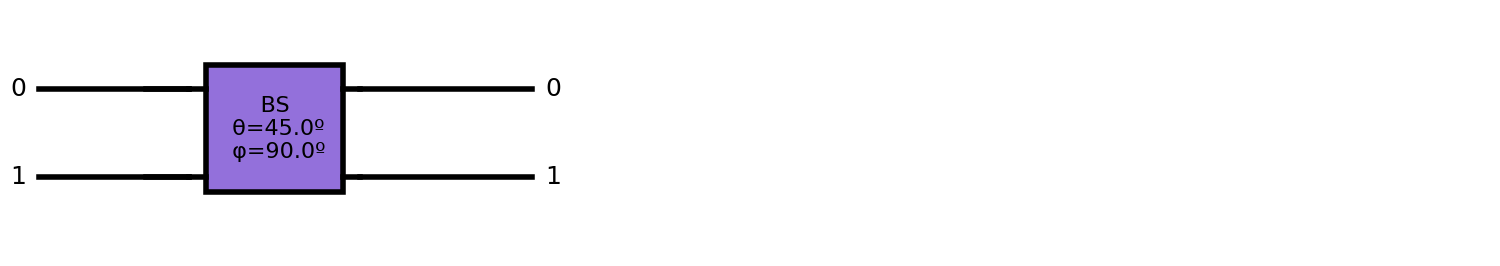

In [9]:
qmap=[[0, 1]]
rx = qoptkit.qocircuit(2);
rx.bs(0,1,45.0,180.0/2.0)
rx.show()

We can test this gate for an input qubit initialized to zero,

In [10]:
qubit = qoptkit.state(1,st=[[1.0,[0]]])
input=qubit.decode(qmap,[],rx) 
output=sim.run(input,rx)
result=output.encode(qmap,rx)
result.prnt_state()

 | 1 >: -0.00000000 - 0.70710678 j
 | 0 >:  0.70710678 + 0.00000000 j



And finally, we can also check the correctness of this result with the equivalent simulation of this gate in QISKIT,

In [11]:
qiskitsim = Aer.get_backend('aer_simulator') 
qc = QuantumCircuit(1)
qc.rx(np.pi/2,0)
qc.save_statevector() 
result = qiskitsim.run(qc).result()
state = result.get_statevector(decimals=8)
print("QISKIT State vector:")
print(" | 0 >: ", ' '  if np.real(state[0]) >= 0.0 else '', np.real(state[0]), '+'  if np.imag(state[0]) >= 0.0 else '-', abs(np.imag(state[0])),'j' )
print(" | 1 >: ", ' '  if np.real(state[1]) >= 0.0 else '', np.real(state[1]), '+'  if np.imag(state[1]) >= 0.0 else '-', abs(np.imag(state[1])),'j' )

QISKIT State vector:
 | 0 >:    0.70710678 + 0.0 j
 | 1 >:    0.0 - 0.70710678 j


### 2.2.2 Ry

We can do the same for the $Ry(\pi/2)$ gate,

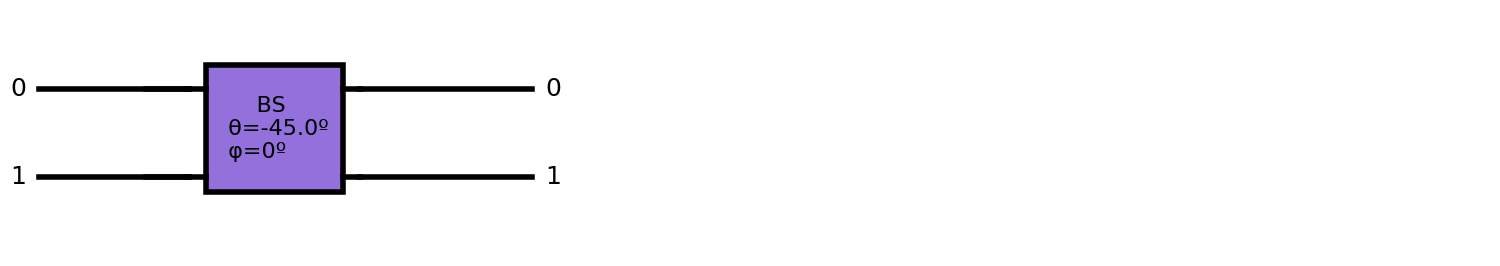

In [12]:
qmap=[[0, 1]]
ry = qoptkit.qocircuit(2);
ry.bs(0,1,-45.0,0)
ry.show()

Again test the gate with an input qubit initialized to zero,

In [13]:
qubit = qoptkit.state(1,st=[[1.0,[0]]])
input=qubit.decode(qmap,[],ry) 
output=sim.run(input,ry)
result=output.encode(qmap,ry)
result.prnt_state()

 | 1 >:  0.70710678 + 0.00000000 j
 | 0 >:  0.70710678 + 0.00000000 j



And check the result with the equivalent QISKIT simulation,

In [14]:
qiskitsim = Aer.get_backend('aer_simulator') 
qc = QuantumCircuit(1)
qc.ry(np.pi/2,0)
qc.save_statevector() 
result = qiskitsim.run(qc).result()
state = result.get_statevector(decimals=8)
print("QISKIT State vector:")
print(" | 0 >: ", ' '  if np.real(state[0]) >= 0.0 else '', np.real(state[0]), '+'  if np.imag(state[0]) >= 0.0 else '-', abs(np.imag(state[0])),'j' )
print(" | 1 >: ", ' '  if np.real(state[1]) >= 0.0 else '', np.real(state[1]), '+'  if np.imag(state[1]) >= 0.0 else '-', abs(np.imag(state[1])),'j' )

QISKIT State vector:
 | 0 >:    0.70710678 + 0.0 j
 | 1 >:    0.70710678 + 0.0 j


### 2.2.3 Rz

Finally, we can also define a $Rz(\pi/2)$ gate,

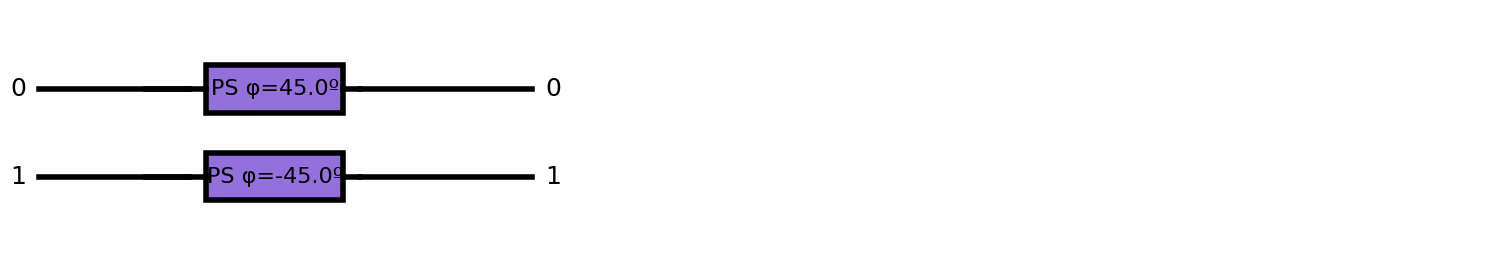

In [15]:
qmap=[[0, 1]]
rz = qoptkit.qocircuit(2);
rz.ph(0,  45)
rz.ph(1, -45)
rz.show()

<p style='text-align: justify'>  In this case, instead of using a beamsplitter gate we have used two phase shifters. A phase shifter adds a phase $e^{i\theta}$ to a state for each photon present in the channel in which it is defined. Once more, we test the gate for an input qubit initialized to zero. The reader may test those gates with other inputs or create rotation gates with different angles. </p>

In [16]:
qubit = qoptkit.state(1,st=[[1.0,[0]]])
input=qubit.decode(qmap,[],rz) 
output=sim.run(input,rz)
result=output.encode(qmap,rz)
result.prnt_state()

 | 0 >:  0.70710678 - 0.70710678 j



Finally, we can check again the result with QISKIT.

In [17]:
qiskitsim = Aer.get_backend('aer_simulator') 
qc = QuantumCircuit(1)
qc.rz(np.pi/2,0)
qc.save_statevector() 
result = qiskitsim.run(qc).result()
state = result.get_statevector(decimals=8)
print("QISKIT State vector:")
print(" | 0 >: ", ' '  if np.real(state[0]) >= 0.0 else '', np.real(state[0]), '+'  if np.imag(state[0]) >= 0.0 else '-', abs(np.imag(state[0])),'j' )
print(" | 1 >: ", ' '  if np.real(state[1]) >= 0.0 else '', np.real(state[1]), '+'  if np.imag(state[1]) >= 0.0 else '-', abs(np.imag(state[1])),'j' )


QISKIT State vector:
 | 0 >:    0.70710678 - 0.70710678 j
 | 1 >:    0.0 + 0.0 j


<p style='text-align: justify'> It is not very difficult to see how these operations can be generalized to any rotation. Therefore, we can implement with optical circuits any single qubit operation. But what about two qubits operations? </p>

## 3 Post-selection

<p style='text-align: justify'> Unfortunately, a linear optical circuit by itself can not implement every possible quantum gate. Some non-linearity is needed to achieve this purpose. It has been demonstrated [2] that the required non-linearity can be introduced by a partial measurement of the circuit output called post-selection. The price to pay is that gates that make use of post-selection only work with a certain probability of success. Let's see an example. </p>

### The $NS_{-1}$ gate

<p style='text-align: justify'>  For example, we can find in the literature [3] a gate that changes the sign of an input state if the number of photons is two. This is, we want a photonic gate that implements the operation,
$$ |0\rangle + |1\rangle + |2\rangle \rightarrow |0\rangle + |1\rangle - |2\rangle$$ </p>

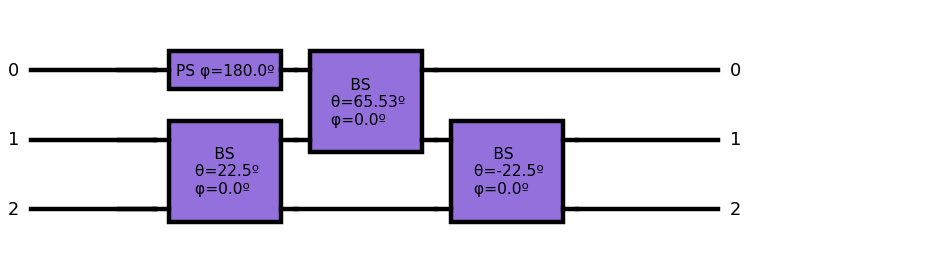

In [18]:
# Create circuit
NSx = qoptkit.qocircuit(3);
# Build circuit
NSx.ph(0,180.0)
NSx.bs(1,2,22.5,0.0)
NSx.bs(0,1,65.5302,0.0)
NSx.bs(1,2,-22.5,0.0)
# Show circuit
NSx.show(depth=8,sizexy=80,font=16)

<p style='text-align: justify'> This gate has three channels instead of one. It adds two auxiliary channels to perform the operation. We will assume, for the moment, that these two extra channels are initialized to 1 and 0 photons respectively and we will require from those channels to have the same values at the output. We will explain the reason below. Therefore,
$$ |0,1,0 \rangle + |1,1,0\rangle + |2,1,0\rangle \rightarrow |0,1,0\rangle + |1,1,0\rangle - |2,1,0\rangle$$ </p>


In [19]:
# Create input state
state=[ [1.0,[0,1,0]],
        [1.0,[1,1,0]],
        [1.0,[2,1,0]],
      ]
inputst = qoptkit.state(NSx.num_ch(),st=state,nph=3)
inputst.prnt_state()

 | 0, 1, 0 >:  1.00000000 + 0.00000000 j
 | 1, 1, 0 >:  1.00000000 + 0.00000000 j
 | 2, 1, 0 >:  1.00000000 + 0.00000000 j



<p style='text-align: justify'> We have left the state intentionally unnormalized as it will simplify an explanation below. Next, we can calculate the output of the circuit with QoptKIT. </p>

In [20]:
sim=qoptkit.simulator()
outputst=sim.run(inputst,NSx)
outputst.prnt_state()

 | 1, 0, 0 >: -0.84089642 + 0.00000000 j
 | 0, 1, 0 >:  0.49999999 + 0.00000000 j
 | 0, 0, 1 >:  0.20710678 + 0.00000000 j
 | 2, 0, 0 >:  0.49258571 - 0.00000000 j
 | 1, 1, 0 >:  0.50000001 - 0.00000000 j
 | 1, 0, 1 >: -0.37867966 + 0.00000000 j
 | 0, 2, 0 >: -0.59460355 + 0.00000000 j
 | 0, 0, 2 >:  0.10201784 - 0.00000000 j
 | 3, 0, 0 >: -0.24989165 + 0.00000000 j
 | 2, 1, 0 >: -0.50000000 + 0.00000000 j
 | 2, 0, 1 >:  0.27817459 - 0.00000000 j
 | 1, 2, 0 >: -0.24629288 + 0.00000000 j
 | 1, 1, 1 >:  0.34831071 - 0.00000000 j
 | 1, 0, 2 >: -0.16177851 + 0.00000000 j
 | 0, 3, 0 >:  0.61237243 - 0.00000000 j
 | 0, 2, 1 >: -0.14644660 + 0.00000000 j
 | 0, 1, 2 >: -0.06066017 + 0.00000000 j
 | 0, 0, 3 >:  0.04351997 - 0.00000000 j



<p style='text-align: justify'> On a first glance the result looks quite different from what we were expecting. However, the intended result is obtained if after measuring channels <i>"1"</i> and  <i>"2"</i>  we require the detection of one photon only in channel <i>"1"</i>. If this condition is met, we conclude the gate has worked, otherwise we reject the result in channel <i>"0"</i> . Post-selected channels <i>"1"</i> and  <i>"2"</i> are erased from the result. </p>

In [21]:
finalst=outputst.post_selection([-1,1,0])
finalst.prnt_state()

 | 0 >:  0.49999999 + 0.00000000 j
 | 1 >:  0.50000001 - 0.00000000 j
 | 2 >: -0.50000000 + 0.00000000 j



<p style='text-align: justify'> Physically post-selection means that we only accept the quantum state defined by channel zero if after a partial measurement of the rest of the channels the result meets the pre-established conditions. The price to pay is that this condition may not be always met. This gate has a success probability of 1/4. This means that only 1 in 4 times on average the "10" condition will be measured in channels 2 and 3. Therefore only around 1 of 4 times this gate will work as intended. This can also be seen in the normalization of the end state that is 1/4. (This is the reason we didn't normalize the state before. It is easier to see the success probability this way). </p>

### CZ gate

<p style='text-align: justify'>  Post-selection is one of the more difficult concepts in quantum computation with photonic circuits but once mastered the sky is the limit. We can use the $NS_{-1}$  gate to build a two qubit CZ gate as shown in [2]. This can be achieved with a eight channel circuit. Four channel for the qubit definitions and four extra ancilla channels for post-selection because this circuit uses two $NS_{-1}$ gates.</p>

In [22]:
qmap=[[0, 1], [2, 3]]
csign = qoptkit.qocircuit(8)
csign.bs(0,2,45.0,0.0)
csign.gate([ 0, 4, 5 ],NSx,"NSX")
csign.gate([ 2, 6, 7 ],NSx,"NSX")
csign.bs(0,2,-45.0,0.0)  

<div>
<img src="./CZ.png" width="1200"/>
</div>
<p style='text-align: center;'> <b>CZ asdescribed in ref. [2] </b></p>

In this case, we choose an input state with all the possibilities in superposition with equal probability.

In [23]:
qubit= qoptkit.state(2,st=[ [0.5,[0,0]], [0.5,[0,1]], [0.5,[1,0]], [0.5,[1,1]] ],nph=2)
qubit.prnt_state()

 | 0, 0 >:  0.50000000 + 0.00000000 j
 | 0, 1 >:  0.50000000 + 0.00000000 j
 | 1, 0 >:  0.50000000 + 0.00000000 j
 | 1, 1 >:  0.50000000 + 0.00000000 j



<p style='text-align: justify'> First, we decode the qubit state into its equivalent photonic state. Next, we obtain the output of the circuit and
apply the post-selection conditions required by the $NS_{-1}$ gates. Finally, we encode the output into a qubit representation. </p>

In [24]:
# Decode input into photonic state
inputst=qubit.decode(qmap,[1,0,1,0],csign)
# Create a simulator
sim=qoptkit.simulator()
# Calculate the output
outputst=sim.run(inputst,csign)
# Apply post-selection
pselected=outputst.post_selection([-1,-1,-1,-1, 1,0,1,0])
# Encode output photonic state into qubit state 
encoded=pselected.encode(qmap,csign)
# Normalize
encoded.normalize()
# Print the resulting state
encoded.prnt_state()

 | 0, 0 >:  0.49999999 + 0.00000000 j
 | 0, 1 >:  0.50000001 - 0.00000000 j
 | 1, 0 >:  0.50000001 - 0.00000000 j
 | 1, 1 >: -0.49999999 + 0.00000000 j



<p style='text-align: justify'> We can see how a phase flip happens for the outcome $|1,1\rangle$. We have normalized the output, otherwise we would see that the success probability of this gate is 1/16. Note that, in this particular case, the post-selected states only contain outcomes with 0 or 1 photons by channel. </p>

In [25]:
pselected.prnt_state()

 | 0, 1, 0, 1 >:  0.12500000 + 0.00000000 j
 | 0, 1, 1, 0 >:  0.12500000 - 0.00000000 j
 | 1, 0, 0, 1 >:  0.12500000 - 0.00000000 j
 | 1, 0, 1, 0 >: -0.12500000 + 0.00000000 j



<p style='text-align: justify'> Therefore, the encoding is straightforward. The encoding operation implemented in QOKIT will ignore outcomes with more than one photon by qubit. This may be used on purpose like a sort of an additional post-selection condition although it has some disadvantages. See our next example. </p>

### CNOT gate

Here we show a CNOT implementation as suggested in ref. [4]. 

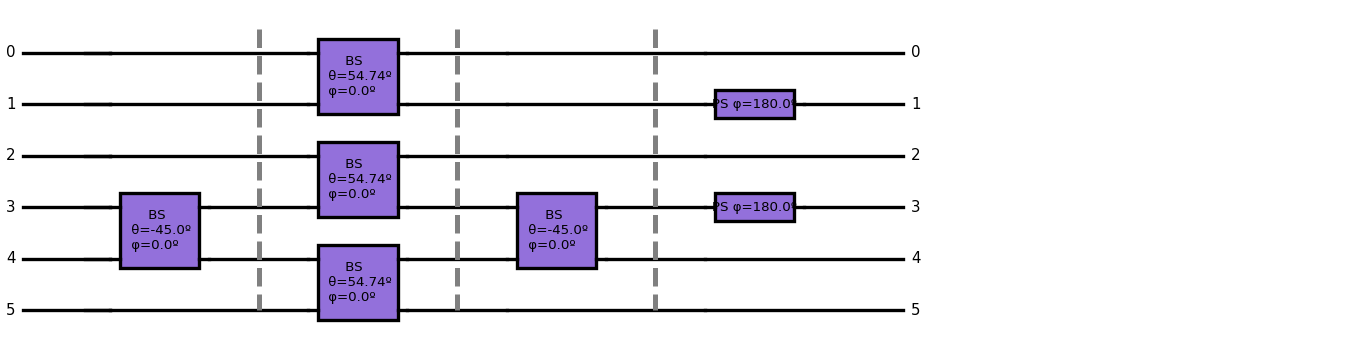

In [26]:
qmap=[[1, 2], [3, 4]]
cnot=qoptkit.qocircuit(6);
cnot.bs(3,4, -45.0,0.0)
cnot.barrier()
cnot.bs(0,1,180*acos(1.0/sqrt(3.0))/pi,0.0)
cnot.bs(2,3,180*acos(1.0/sqrt(3.0))/pi,0.0)
cnot.bs(4,5,180*acos(1.0/sqrt(3.0))/pi,0.0)
cnot.barrier()
cnot.bs(3,4, -45.0,0.0)
cnot.barrier()
cnot.ph(1, 180)
cnot.ph(3, 180)
cnot.show(depth=15,sizexy=60,font=18)

Below it is shown how to perform the simulation for the case of a $|10\rangle$ input state. We invite the reader to check the rest of possible inputs.

In [27]:
# Input state (qubit definition)
qubit= qoptkit.state(2,st=[[1.0,[1,0]]])
# Decode input into photonic state
input=qubit.decode(qmap,[0,0],cnot)
# Create a simulator
sim=qoptkit.simulator()
# Calculate the output
output=sim.run(input,cnot)
# Apply post-selection
pselected=output.post_selection([0,-1,-1,-1,-1, 0])
# Encode output photonic state into qubit state 
encoded=pselected.encode(qmap,cnot)

Now, we can show the output. However, this time we will plot the probabilities instead of printing the states,

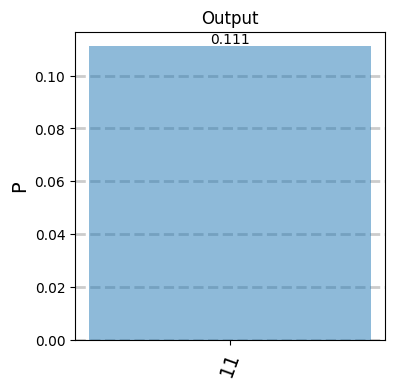

In [28]:
encoded.show(sizex=4,sizey=4)

<p style='text-align: justify'> Note that the normalization 1/9 correspond with the success probability of this gate. Here we have printed the outcome probabilities after the encoding of the photonic state into qubits. However, if we plot the outcome probabilities of the photonic state directly we can see that there are two possible different outcomes. A "1010" outcome with success probability 1/9 that corresponds with a 11 qubit configuration and a "1100" outcome that has no valid encoding. </p>

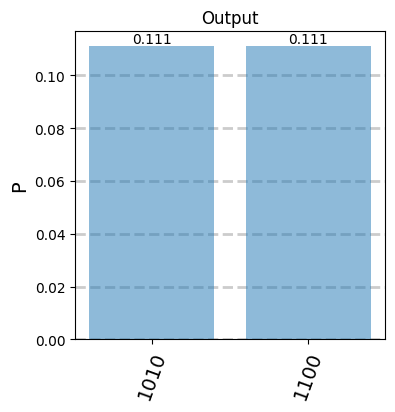

In [29]:
pselected.show(sizex=4,sizey=4)

<p style='text-align: justify'> We reject outcomes that can not be encoded. This can be understood as a sort of an additional post-selection condition. Of course, that means that this CNOT gate
can work as a CNOT in an isolated way but can not be used to design large circuits like the CZ because these extra outcomes will play a role once multiple gates are interconnected.  </p>

## Bibliography

**[1]** C. K. Hong, Z. Y. Ou and L. Mandel, **Phys. Rev. Lett. 59 (18): 2044–2046.** (1987) 

**[2]** E. Knill, R. Laflamme, G. J. Milburn, **Nature 409 46-52** (2001) 

**[3]** C. Myers et Al. **Quantum Computers, Algorithms and Chaos, vol. 162, IOS Press, pp. 45–93** (2006) 

**[4]** J L O'Brien, G J Pryde, A G White, T C Ralph, D Branning, **Nature 426:264** (2003)

**THIS CODE IS PART OF QoptKIT** <br>

**Copyright:** <br>
Copyright © 2023 National University of Ireland Maynooth, Maynooth University.

Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the <a href="./LICENSE.TXT">License</a>